### Importing the necessary Libraries


In [28]:
import numpy as np
import pandas as pd
import librosa 
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [29]:
import IPython.display as ipd
import librosa.display

### Exploratory Data Analysis

We will plot the sound waves of different sounds present in our data using librosa and explore their sampling rates and data points.

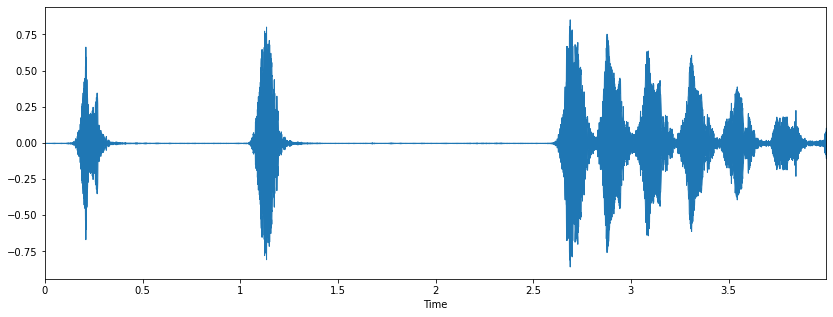

In [30]:
### Dog Sound
filename='UrbanSound8K/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)



In [31]:
print(sample_rate)
print(data)

22050
[-0.00011783 -0.00017157 -0.00017749 ... -0.04598654 -0.04624664
 -0.05089863]


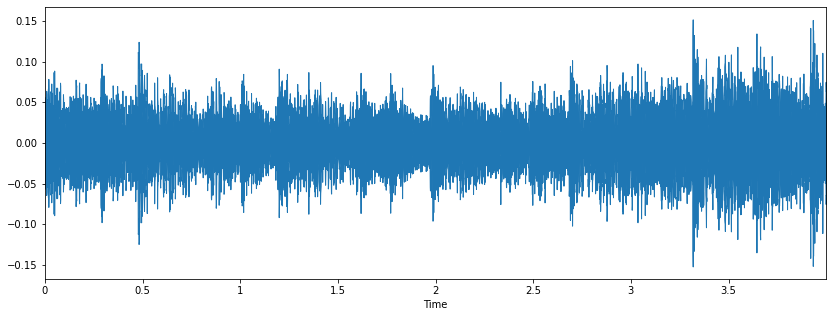

In [32]:
### Street Music
filename='UrbanSound8K/UrbanSound8K/audio/fold5/108357-9-0-27.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [33]:
print(sample_rate)
print(data)

22050
[0.01818735 0.03821337 0.03542221 ... 0.02400585 0.02088001 0.01985979]


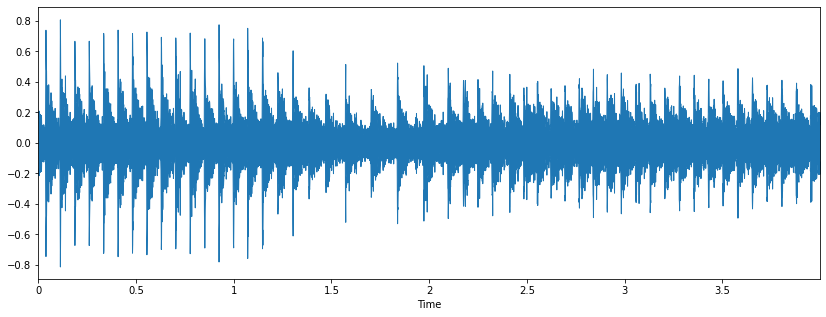

In [34]:
### Drilling sound
filename='UrbanSound8K/UrbanSound8K/audio/fold10/162134-7-11-4.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [35]:
print(sample_rate)
print(data)

22050
[-0.06863973 -0.06872962 -0.1014991  ...  0.01561349  0.03130144
 -0.04377935]


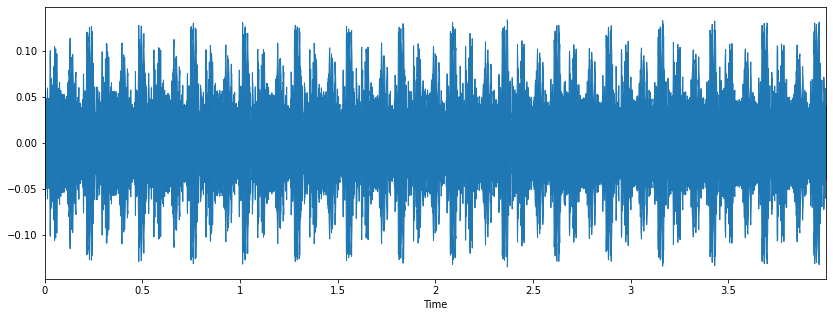

In [36]:
### siren sound
filename='UrbanSound8K/UrbanSound8K/audio/fold5/111671-8-0-5.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [37]:
print(sample_rate)
print(data)

22050
[-0.00065786 -0.01282973 -0.02748164 ... -0.03938766 -0.04090875
 -0.04214798]


1) We can see that librosa has returned its default sampling rate of 22050 for each audio file and also has returned scaled wave data for each sound.

2) It has also converged all the waves into one single channel even if the wave may have 2 diffent channels.

2) We will now experiment with scipy too and observe the sampling rate and audio_data provided by it for different audio files and also see the channels returned.

In [38]:
#Importing wavfile from scipy.io
from scipy.io import wavfile as wav

In [39]:
#sampling rate and audio_data extracted using scipy for dog sound
filename='UrbanSound8K/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
wave_sample_rate, wave_audio=wav.read(filename)
print(wave_sample_rate)
print(wave_audio)


48000
[   -5    -5    -6 ... -1576 -1566 -1557]


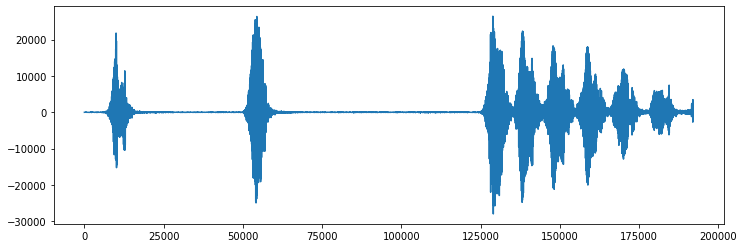

In [40]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [41]:
#sampling rate and audio_data extracted using scipy for siren sound
filename='UrbanSound8K/UrbanSound8K/audio/fold5/111671-8-0-5.wav'
wave_sample_rate, wave_audio=wav.read(filename)
print(wave_sample_rate)
print(wave_audio)


48000
[[ -656   720]
 [-1080   728]
 [-1474   662]
 ...
 [-1666 -1036]
 [-1716  -870]
 [-1762  -756]]


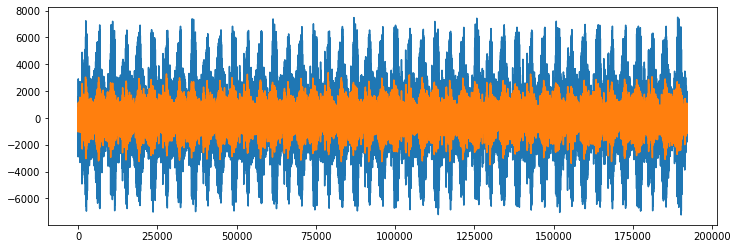

In [42]:
# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

1) We can observe some differences between the sampling rates and audio data returned using scipy, the data returned is not scaled and the channels are not converged into one channel.

2) We can deduce based on our observations that librosa is more suitable compared to scipy.


In [43]:
# Reading the metadata file
metadata=pd.read_csv('UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)


slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
5  children_playing  
6  children_playing  
7  children_playing  
8  children_playing  
9          car_horn

In [44]:
metadata.shape

(8732, 8)

In [45]:
#Value counts of different classes in our data
metadata['class'].value_counts()

children_playing    1000
jackhammer          1000
street_music        1000
engine_idling       1000
air_conditioner     1000
drilling            1000
dog_bark            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

We can see that our classes are not imbalanced and thus we can go ahead for extracting new features from our audio files.

### Feature Engineering

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [46]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=50)
print(mfccs.shape)

(50, 173)


In [47]:
mfccs

array([[-2.45340179e+02, -2.37305603e+02, -2.65092712e+02, ...,
        -2.85092194e+02, -2.73812012e+02, -2.71480499e+02],
       [ 1.51237900e+02,  1.50804291e+02,  1.03000137e+02, ...,
         7.94332809e+01,  1.00025665e+02,  1.18611923e+02],
       [-5.28454819e+01, -7.59618912e+01, -1.17119644e+02, ...,
        -1.26232269e+02, -1.09608246e+02, -8.33092957e+01],
       ...,
       [-6.81208611e-01, -2.98483896e+00,  2.10474968e-01, ...,
         2.45521307e+00,  2.42292732e-02, -3.91422868e-01],
       [ 2.06785274e+00, -5.31392634e-01,  1.21632326e+00, ...,
         3.36885810e-01, -2.57135582e+00, -5.10296822e-02],
       [-2.01573968e-03, -1.65003645e+00, -1.09915957e-01, ...,
         2.83368707e-01,  2.04890633e+00,  2.20402670e+00]], dtype=float32)

In [48]:
audio_dataset_path='UrbanSound8K/UrbanSound8K/audio/'

We will create now a function which will take the audio file as input and return its scaled mfccs features which will be used as input to our model for classifying sounds.

In [49]:
#Function for feature extraction
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [50]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [25:28,  5.28it/s]c:\users\sumedh\cdc\projects\audio classification (deep learning)\.audio_venv\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [43:53,  7.79it/s]c:\users\sumedh\cdc\projects\audio classification (deep learning)\.audio_venv\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8327it [43:53,  8.16it/s]c:\users\sumedh\cdc\projects\audio classification (deep learning)\.audio_venv\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [44:55,  3.24it/s]


In [51]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

features             class
0  [-215.79301, 71.66612, -131.81377, -52.091328,...          dog_bark
1  [-424.68677, 110.56227, -54.148235, 62.01074, ...  children_playing
2  [-459.56467, 122.800354, -47.92471, 53.265694,...  children_playing
3  [-414.55377, 102.896904, -36.66495, 54.18041, ...  children_playing
4  [-447.397, 115.0954, -53.809113, 61.608585, 1....  children_playing

### Model Execution

In [53]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [54]:
X

array([[-2.15793015e+02,  7.16661224e+01, -1.31813766e+02, ...,
         6.55185819e-01, -4.39629078e+00,  1.60040736e+00],
       [-4.24686768e+02,  1.10562271e+02, -5.41482353e+01, ...,
        -1.62257150e-01, -6.28080368e-01, -9.52579379e-01],
       [-4.59564667e+02,  1.22800354e+02, -4.79247093e+01, ...,
        -1.07087624e+00, -9.51395988e-01, -9.23351288e-01],
       ...,
       [-3.04613159e+02,  1.12619904e+02, -4.71619453e+01, ...,
         6.96556747e-01,  3.45421600e+00, -1.81610954e+00],
       [-3.44714233e+02,  1.26758133e+02, -5.61771698e+01, ...,
        -9.79770005e-01,  8.80493522e-02, -3.05488133e+00],
       [-3.15933838e+02,  9.56758881e+01, -3.80477676e+01, ...,
         4.27319860e+00, -3.66142702e+00, -8.07386684e+00]], dtype=float32)

In [55]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [56]:
### Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [57]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [59]:
### No of classes
num_labels=y.shape[1]
num_labels


10

In [105]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               5100      
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)              

In [107]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [108]:
## Trianing model
num_epochs = 200
num_batch_size = 32

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),verbose=1)



Epoch 1/200
219/219 [==============================] - 1s 3ms/step - loss: 10.5164 - accuracy: 0.1399 - val_loss: 2.0299 - val_accuracy: 0.3572
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 2.7302 - accuracy: 0.1980 - val_loss: 2.0185 - val_accuracy: 0.3641
Epoch 3/200
219/219 [==============================] - 1s 3ms/step - loss: 2.1950 - accuracy: 0.2405 - val_loss: 1.9302 - val_accuracy: 0.3841
Epoch 4/200
219/219 [==============================] - 1s 3ms/step - loss: 1.9979 - accuracy: 0.2998 - val_loss: 1.8208 - val_accuracy: 0.4299
Epoch 5/200
219/219 [==============================] - 1s 3ms/step - loss: 1.8801 - accuracy: 0.3329 - val_loss: 1.7049 - val_accuracy: 0.4762
Epoch 6/200
219/219 [==============================] - 1s 3ms/step - loss: 1.7849 - accuracy: 0.3742 - val_loss: 1.6048 - val_accuracy: 0.5226
Epoch 7/200
219/219 [==============================] - 1s 3ms/step - loss: 1.7040 - accuracy: 0.4013 - val_loss: 1.5207 - val_accuracy: 0.531

In [109]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8128219842910767


We have achieved an accuracy score of 0.81 on our test data.